# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

# Name:Yuxiang Hou                                            

# USCID:1126739072

Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:

i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

1.The hamming scores means that the percent of misclassification. 


ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both normalized and raw attributes and report the results.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Frogs_MFCCs.csv")

In [3]:
from sklearn import preprocessing
from sklearn import svm

In [4]:
def trasfer_data():
    le = preprocessing.LabelEncoder()
    le.fit(data["Family"])
    data["Family"]=le.transform(data["Family"])
    
    le.fit(data["Genus"])
    data["Genus"]=le.transform(data["Genus"])
    
    le.fit(data["Species"])
    data["Species"]=le.transform(data["Species"])
    
    

In [5]:
trasfer_data()

In [6]:
linear_svc=svm.SVC(kernel='rbf')

In [7]:
family_data=data.drop(["Genus","Species","RecordID"],axis=1)
genus_data=data.drop(["Family","Species","RecordID"],axis=1)
species_data=data.drop(["Family","Genus","RecordID"],axis=1)

In [8]:
family_y=list(data["Family"])
family_x=data.drop(["Family","Genus","Species","RecordID"],axis=1)

genus_y=list(data["Genus"])
genus_x=data.drop(["Family","Genus","Species","RecordID"],axis=1)

species_y=list(data["Species"])
species_x=data.drop(["Family","Genus","Species","RecordID"],axis=1)

In [9]:
from sklearn.metrics import accuracy_score

Choose 70% of the data randomly as the training set.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
family_x_train, family_x_test,family_y_train,family_y_test = train_test_split(family_x, family_y, test_size=0.3, random_state=42)
genus_x_train, genus_x_test, genus_y_train, genus_y_test = train_test_split(genus_x, genus_y, test_size=0.3, random_state=42)
species_x_train, species_x_test, species_y_train, species_y_test = train_test_split(species_x, species_y, test_size=0.3, random_state=42)

# Raw SVM Gaussian Kernels

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
gamma_range = np.logspace(-3, 1, 5)


In [52]:
linear_svc=svm.SVC(kernel='rbf') #there are two main parameters, C and degree
parameters = { 'C':[1,2,3,4],'gamma':[x for x in gamma_range]}
clf = GridSearchCV(linear_svc, parameters,cv=10)
clf.fit(family_x_train,family_y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
res=clf.predict(family_x_test)

In [54]:
accuracy_score(res,family_y_test)

0.9884205650764243

In [55]:
clf.fit(genus_x_train,genus_y_train)
genus_res=clf.predict(genus_x_train)
print(accuracy_score(genus_res,genus_y_train))

0.9960285941223193


In [56]:
clf.fit(species_x_train,species_y_train)
species_res=clf.predict(species_x_train)
print(accuracy_score(species_res,species_y_train))

0.9978157267672756


From the above result, we can find that if we use the Raw data without the Normalization, the accuracy score is around 99% percent,and then we will try to utilize the normalized result.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()
family_x_train_normalized=min_max_scaler.fit_transform(family_x_train)
genus_x_train_normalized=min_max_scaler.fit_transform(genus_x_train)
species_x_train_normalized=min_max_scaler.fit_transform(species_x_train)


In [58]:
clf.fit(family_x_train_normalized,family_y_train)
family_res=clf.predict(family_x_train_normalized)
print(accuracy_score(family_res,family_y_train))

1.0


After normalization, the accuracy improved from 98.8% to 100% percent for family class

In [59]:
clf.fit(genus_x_train_normalized,genus_y_train)
genus_res=clf.predict(genus_x_train_normalized)
print(accuracy_score(genus_res,genus_y_train))

0.9944400317712471


After normalization , the accuracy of genus class decreased  from 99.6% to 99.4% percent. 

In [60]:
clf.fit(species_x_train_normalized,species_y_train)
species_res=clf.predict(species_x_train_normalized)
print(accuracy_score(species_res,species_y_train))

0.9950357426528992


Conclusion: From the above experiments, we can find that the normalized result will improve the results from 99.7% percent to 99.5% percent 

# iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to normalize the at- tributes.

In [80]:
svm_model=svm.LinearSVC(penalty="l1")

In [88]:
# parameters = { 'C':[1,2,3,4,5,6],'tol':[0.0001,0.001,0.01]}
#then we have to utilize the for loop to get it
def L1_SVM_Model(x,y):
    best_c=None
    best_tol=None
    res=0
    for i in range(1,11):
        C=i
        for j in [0.0001,0.001, 0.01,0.1]:
            tol=j
            svm_model=svm.LinearSVC(penalty="l1",C=C,tol=tol,dual=False)
            scores = cross_val_score(svm_model,x,y,cv=10)
            avg_scores=np.mean(scores)
            print("When C = "+str(C)+" And tol= "+str(tol)+" The result is: "+str(avg_scores))
            
            if avg_scores>res:
                res=avg_scores
                best_c=C
                best_tol=tol
    return res,best_c,best_tol
           
            

In [89]:
print(L1_SVM_Model(family_x_train_normalized,family_y_train))
print(L1_SVM_Model(genus_x_train_normalized,genus_y_train))
print(L1_SVM_Model(species_x_train_normalized,species_y_train))

When C = 1 And tol= 0.0001 The result is: 0.936466680372642
When C = 1 And tol= 0.001 The result is: 0.9378555739481682
When C = 1 And tol= 0.01 The result is: 0.9354730390459987
When C = 1 And tol= 0.1 The result is: 0.928521475627182
When C = 2 And tol= 0.0001 The result is: 0.9368627199766024
When C = 2 And tol= 0.001 The result is: 0.93706152713366
When C = 2 And tol= 0.01 The result is: 0.9356710588479789
When C = 2 And tol= 0.1 The result is: 0.9285242259207338
When C = 3 And tol= 0.0001 The result is: 0.93706152713366
When C = 3 And tol= 0.001 The result is: 0.93706152713366
When C = 3 And tol= 0.01 The result is: 0.9366650946332671
When C = 3 And tol= 0.1 The result is: 0.9277266414575962
When C = 4 And tol= 0.0001 The result is: 0.9374591414477752
When C = 4 And tol= 0.001 The result is: 0.93706152713366
When C = 4 And tol= 0.01 The result is: 0.9362682676742292
When C = 4 And tol= 0.1 The result is: 0.9269329859865703
When C = 5 And tol= 0.0001 The result is: 0.93706152713366

So the result above for family class, the best classification rate is 93.7%. For Genus class, the classification rate is 94.7%, and for Species, the rate is 95.7%. 

# Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [11]:
from imblearn.over_sampling import SMOTE

In [26]:
def getPerecentInList(alist):
    adict={}
    for number in alist:
        if number not in adict:
            adict[number]=1
        else:
            adict[number]+=1
    
    for key in adict:
        adict[key]=(adict[key])/len(alist)
        
    return adict

print(getPerecentInList(family_y))


{3: 0.6143154968728284, 1: 0.07533009034051424, 2: 0.30090340514246006, 0: 0.00945100764419736}


In [37]:
#from the smote algorithm
#family, genus,species
#smote algroithm will increase the imbalance data by 人为的创造新数据
sm = SMOTE(random_state=12)

family_train_x_sm,family_train_y_sm=sm.fit_sample(family_x_train,family_y_train)
genus_train_x_sm,genus_train_y_sm=sm.fit_sample(genus_x_train,genus_y_train)
species_train_x_sm,species_train_y_sm=sm.fit_sample(species_x_train,species_y_train)

In [36]:
#baseline is 92%

svm_model=svm.LinearSVC()
svm_model.fit(family_x_train,family_y_train)
family_test_pre_y=svm_model.predict(family_x_test)
print("Accuracy Score is: "+str(accuracy_score(family_test_pre_y,family_y_test)))

Accuracy Score is: 0.9277443260768874


In [38]:
svm_model=svm.LinearSVC()
svm_model.fit(family_train_x_sm,family_train_y_sm)
family_test_pre_y=svm_model.predict(family_x_test)
print("Accuracy Score is: "+str(accuracy_score(family_test_pre_y,family_y_test)))

Accuracy Score is: 0.8985641500694767


In [39]:
svm_model=svm.LinearSVC()
svm_model.fit(genus_train_x_sm,genus_train_y_sm)
score=svm_model.score(genus_x_test,genus_y_test)
print(score)

0.9018063918480778


In [40]:
svm_model=svm.LinearSVC()
svm_model.fit(species_train_x_sm,species_train_y_sm)
score=svm_model.score(species_x_test,species_y_test)
print(score)

0.9620194534506716


From the above experiments, for some classification situation, SMOTE algoritgm improves the accuracy. But some classes like family, it did not behave very well. 

# v. Extra Practice: Study the Classifier Chain method and apply it to the above problem.

In [32]:
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata

In [33]:
#for the family situation 
ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(family_x_train,family_y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [34]:
Y_pred_ovr = ovr.predict(family_x_test)
ovr_jaccard_score = jaccard_similarity_score(family_y_test, Y_pred_ovr)

In [35]:
chains = [ClassifierChain(LogisticRegression(), order='random', random_state=i,cv=5)
          for i in range(10)]

In [38]:
Y = label_binarize(Y, classes=[0, 1, 2,3])


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [44]:
chains = [ClassifierChain(LogisticRegression(), order='random', random_state=i)
          for i in range(10)]
for chain in chains:
    chain.fit(X_train, Y_train)

Y_pred_chains = np.array([chain.predict(X_test) for chain in
                          chains])
chain_jaccard_scores = [jaccard_similarity_score(Y_test, Y_pred_chain >= .5)
                        for Y_pred_chain in Y_pred_chains]

Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_similarity_score(Y_test,
                                                  Y_pred_ensemble >= .5)

model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

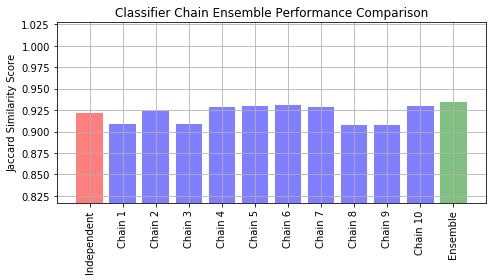

In [45]:
model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10',
               'Ensemble')

x_pos = np.arange(len(model_names))

# Plot the Jaccard similarity scores for the independent model, each of the
# chains, and the ensemble (note that the vertical axis on this plot does
# not begin at 0).

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * len(chain_jaccard_scores) + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

From the above result we can find that the ensemble model has almost 92.5% accuracy

# vi. Extra Practice: Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained in above.

Precision-recall curves are typically used in binary classification to study the output of a classifier. In order to extend the precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to binarize the output. So we will calculate the average precision and recall, result

# For family

In [25]:
X=np.array(family_data.drop("Family",axis=1))
Y=family_data["Family"]

In [26]:
from sklearn.preprocessing import label_binarize
Y = label_binarize(Y, classes=[0, 1, 2,3])
n_classes = Y.shape[1]

In [27]:
Y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
                                                    

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=42))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.96


In [30]:
#then make the confusion matrix, it is same as the binary situation
X=family_data.drop("Family",axis=1)
Y=family_data["Family"]
svm_linear=svm.LinearSVC(random_state=41)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
svm_linear.fit(X_train,Y_train)
Y_test_pre=svm_linear.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test_pre,Y_test))

[[   0    0    0    0]
 [   0  154   14   12]
 [  13   12  597   23]
 [   0    3   57 1274]]


# Make ROC and AUC curve 

In [18]:
#then make the ROC and AUC Curve for the family class.
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
X = family_data.drop("Family",axis=1)
y = list(family_data["Family"])

# Binarize the output
y = label_binarize(y, classes=[0,1,2,3])
n_classes = y.shape[1]



In [19]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 2 * n_features)]





In [20]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [21]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [22]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

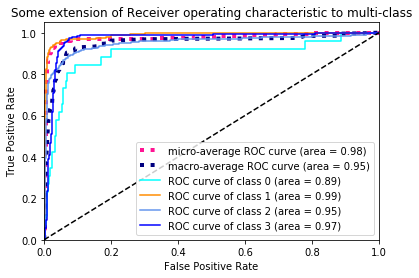

In [23]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue',"blue","yellow","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, #lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()